In [43]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [9]:
comps = ['GAZP', 'PHOR', 'NVTK', 'LKOH', 'DSKY']
comp = comps[0]
df = pd.DataFrame()
for comp in comps:
    data = pd.read_csv('Downloads/{}_180501_180901.csv'.format(comp))
    df = df.append(data)

In [32]:
x = '20180501'
# datetime(int(x[0:4]), int(x[4:6]), int(x[6:8]))
todt = lambda x: datetime(int(x[0:4]), int(x[4:6]), int(x[6:8]))
todt(x)                          

datetime.datetime(2018, 5, 1, 0, 0)

In [37]:
from datetime import datetime
# df[df['<TICKER>'] == 'GAZP']
df['date'] = df['<DATE>'].apply(lambda x: datetime(int(str(x)[0:4]), int(str(x)[4:6]), int(str(x)[6:8])))
df['price'] = df['<CLOSE>']
df['ticker'] = df['<TICKER>']
data = df[['date', 'price', 'ticker']]

In [63]:
prices = []
for i in data['price']:
    if len(str(i)) >= 7:
        i = i[:-6].replace('.', '')
        i = float(i)/10
        prices.append(i)
    else:
        prices.append(float(i))
data['price'] = prices

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


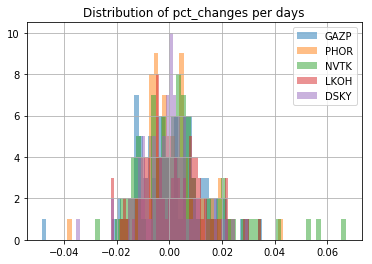

In [68]:
for comp in comps:
    data[data['ticker'] == comp]['price'].pct_change().hist(bins = 50, alpha = 0.5)
plt.legend(comps)
plt.title('Distribution of pct_changes per days')
plt.show()

In [74]:
# se, var, mean change
for comp in comps:
    print(comp, data[data['ticker'] == comp]['price'].pct_change().mean(), data[data['ticker'] == comp]['price'].pct_change().var())
    print(data[data['ticker'] == comp]['price'].pct_change().describe())

GAZP 0.00047604426511433333 0.00016337174946265076
count    86.000000
mean      0.000476
std       0.012782
min      -0.048311
25%      -0.008168
50%      -0.000728
75%       0.007584
max       0.035205
Name: price, dtype: float64
PHOR 0.00045512245362640675 0.00012318228239724293
count    86.000000
mean      0.000455
std       0.011099
min      -0.038653
25%      -0.005992
50%      -0.000872
75%       0.005363
max       0.043066
Name: price, dtype: float64
NVTK 0.004286888157978437 0.0002730250948183577
count    86.000000
mean      0.004287
std       0.016523
min      -0.028066
25%      -0.005401
50%       0.002213
75%       0.008815
max       0.067221
Name: price, dtype: float64
LKOH 0.0015459499230286353 0.00014471186619440874
count    86.000000
mean      0.001546
std       0.012030
min      -0.022248
25%      -0.007640
50%       0.001400
75%       0.009513
max       0.034947
Name: price, dtype: float64
DSKY -0.00039566743158334794 9.675576894199545e-05
count    86.000000
mean     -

In [89]:
print('Covariations')
matrix = []
for comp in comps:
    if comp != 'DSKY':
        print(comp)
        row = data[data['ticker'] != comp]['price'].pct_change().dropna().values
        matrix.append(row)
covar = np.cov(matrix)
covar

Covariations
GAZP
PHOR
NVTK
LKOH


array([[ 0.02741341,  0.01755149, -0.02500659, -0.0357798 ],
       [ 0.01755149,  0.07320411,  0.19229664,  0.18156292],
       [-0.02500659,  0.19229664,  0.72510874,  0.72283195],
       [-0.0357798 ,  0.18156292,  0.72283195,  0.72548874]])

In [84]:
len(matrix)

348

In [ ]:
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)


In [112]:
func([1, 1])

IndexError: list index out of range

In [130]:
func([4, 4])

1.20513548888


In [126]:
import numpy as np
from scipy.optimize import minimize

def func(w, matrix = matrix):

#     L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    print((w[0]**2)*np.var(matrix[0]) + (w[1]**2)*np.var(matrix[1]) + w[1]*w[0]*np.cov(matrix)[0][2])

bnds = ((0.25, 0.75), (0, 2.0))
res = minimize(func, (0, 2.0), bounds = bnds, )

0.281177707938
0.281177707938
0.281177707575


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [90]:
from scipy import optimize
Var2P = (x**2)*np.var()  = #var of portfolio